<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-JavyMB/blob/main/A01794423_Actividad5_Reduccion_dimensiones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tecnológico de Monterrey 
## Maestría en Inteligencia Artificial Aplicada  
### Ciencia y analítica de datos 

**Alumno**: Javier Munoz Barrios


**Matricula**: A01794423

# Bienvenido al notebook
#Repaso de Reducción de dimensiones
El objetivo es que entendamos de una manera visual, que es lo que pasa cuando nosotros seleccionamos cierto número de componentes principales o % de variabilidad  de una base de datos.

Primero entenderemos, que pasa adentro de PCA que se basa en lo siguiente a grandes razgos:

**Análisis de Componentes Principales**

El análisis de datos multivariados involucra determinar transformaciones lineales que ayuden
a entender las relaciones entre las características importantes de los datos. La idea central del Análisis de Componentes Principales (PCA) es reducir las dimensiones de un conjunto de datos que presenta variaciones correlacionadas, reteniendo una buena proporción de la variación presente en dicho conjunto. Esto se logra obteniendo la transformación a un nuevo conjunto de variables: los componentes principales (PC). Cada PC es una combinación lineal con máxima varianza en dirección ortogonal a los demás PC.


![title](https://miro.medium.com/max/720/1*XGaA7KWUlhWZLIezYEBIHA.gif)


Para entender un poco más de PCA y SVD, visita el siguiente link:
*Truco: Prueba entrar con tu cuenta del tec :)*

https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8


Basicamente, vamos a seguir los siguientes pasos:

1. Obtener la covarianza. OJO: X tiene sus datos centrados :)

![title](https://miro.medium.com/max/194/1*92t9OuqxIG0YpJXsNNgI4A.png)

2. Los componentes principales se van a obtener de la eigen descomposicion de la matriz de covarianza.

![title](https://miro.medium.com/max/260/1*c1S0_26A8RxEQQUVyMp5Vw.png)

3. Para la reducción de dimensiones vamos a seleccionar k vectores de W y proyectaremos nuestros datos.

![title](https://miro.medium.com/max/214/1*jnj2YMpWIApnCzxRU_zjfg.png)

![title](https://miro.medium.com/max/720/1*ba0XpZtJrgh7UpzWcIgZ1Q.jpeg)






# Ejercicio 1, Descomposición y composición
***Descomposición***

Encuentra los eigenvalores y eigenvectores de las siguientes matrices

$A = \begin{pmatrix} 3,0,2 \\ 3,0,-2 \\ 0,1,1 \end{pmatrix}$
$A2 = \begin{pmatrix} 1,3,8 \\ 2,0,0 \\ 0,0,1 \end{pmatrix}$
$A3 = \begin{pmatrix} 5,4,0 \\ 1,0,1 \\ 10,7,1 \end{pmatrix}$

y reconstruye la matriz original a traves de las matrices 
$WDW^{-1}$ (OJO. Esto es lo mismo de la ecuación del paso 2 solo le cambiamos la variable a la matriz diagonal)




# Eigenvalores y eigenvectores

In [29]:
###-----------------EJEMPLO DE EIGENVALORES
import numpy as np
from numpy import array
from numpy.linalg import eig
# define la matriz
A = array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

print("-------Matriz original-------")
print(A)
print("-----------------------------")
# calcula la eigendescomposición
values, vectors = eig(A)
print(values) #D
print(vectors) #W

#Ejemplo de reconstrucción


values, vectors = np.linalg.eig(A)

W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)
#la matriz B tiene que dar igual a A
#reconstruye la matriz 
print(W)
print(D)
print(Winv)
print("-------Matriz reconstruida-------")
# Realiza la reconstruccion de B=W*D*Winv, te da lo mismo de A?
#ojo, estas multiplicando matrices, no escalares ;)
#TU CODIGO AQUI-------------------------------------
# Otra opcion podria ser usando numpy 
# B= np.matrix(W)* np.matrix(D)* np.matrix(Winv)
# B = np.dot(np.dot(W, D),Winv)
B = W @ D @ Winv # python 3 nos permite multiplicar matriz con el simbolo @ 
print(B)
print("-----------------------------")

-------Matriz original-------
[[1 2 3]
 [4 5 6]
 [7 8 9]]
-----------------------------
[ 1.61168440e+01 -1.11684397e+00 -1.30367773e-15]
[[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]
[[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]
[[ 1.61168440e+01  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -1.11684397e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -1.30367773e-15]]
[[-0.48295226 -0.59340999 -0.70386772]
 [-0.91788599 -0.24901003  0.41986593]
 [ 0.40824829 -0.81649658  0.40824829]]
-------Matriz reconstruida-------
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
-----------------------------


$A = \begin{pmatrix} 3,0,2 \\ 3,0,-2 \\ 0,1,1 \end{pmatrix}$
$A2 = \begin{pmatrix} 1,3,8 \\ 2,0,0 \\ 0,0,1 \end{pmatrix}$
$A3 = \begin{pmatrix} 5,4,0 \\ 1,0,1 \\ 10,7,1 \end{pmatrix}$

In [31]:
#Matriz 1
print("-------Matriz original-------")
A1 = array([[3, 0, 2], [3, 0, -2], [0, 1, 1]])
print(A1)
print('-------')
values, vectors = eig(A1)
print(values) #D
print(vectors) #W

print("-------Matriz reconstruida-------")
values, vectors = np.linalg.eig(A1)
W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)
# B = np.round(np.dot(np.dot(W, D),Winv))
B = np.round(W @ D @ Winv)
print(B)
print("-----------------------------")

-------Matriz original-------
[[ 3  0  2]
 [ 3  0 -2]
 [ 0  1  1]]
-------
[3.54451153+0.j         0.22774424+1.82582815j 0.22774424-1.82582815j]
[[-0.80217543+0.j         -0.04746658+0.2575443j  -0.04746658-0.2575443j ]
 [-0.55571339+0.j          0.86167879+0.j          0.86167879-0.j        ]
 [-0.21839689+0.j         -0.16932106-0.40032224j -0.16932106+0.40032224j]]
-------Matriz reconstruida-------
[[ 3.+0.j  0.-0.j  2.-0.j]
 [ 3.-0.j  0.+0.j -2.+0.j]
 [ 0.+0.j  1.-0.j  1.+0.j]]
-----------------------------


In [30]:
#Matriz 2
print("-------Matriz original-------")
A2 = array([[1, 3, 8], [2, 0, 0], [0, 0, 1]])
print(A2)
print('-------')
values, vectors = eig(A2)
print(values) #D
print(vectors) #W

print("-------Matriz reconstruida-------")
values, vectors = np.linalg.eig(A2)
W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)
B= np.round(W @ D @ Winv)
print(B)
print("-----------------------------")

-------Matriz original-------
[[1 3 8]
 [2 0 0]
 [0 0 1]]
-------
[ 3. -2.  1.]
[[ 0.83205029 -0.70710678 -0.42399915]
 [ 0.5547002   0.70710678 -0.8479983 ]
 [ 0.          0.          0.31799936]]
-------Matriz reconstruida-------
[[1. 3. 8.]
 [2. 0. 0.]
 [0. 0. 1.]]
-----------------------------


In [ ]:
#Matriz 3
print("-------Matriz original-------")
A3 = array([[5, 4, 0], [1, 0, 1], [10, 7, 1]])
print(A3)
print('-------')
values, vectors = eig(A3)
print(values) #D
print(vectors) #W

print("-------Matriz reconstruida-------")
values, vectors = np.linalg.eig(A3)
W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)
# W, D, Winv = np.matrix(W), np.matrix(D), np.matrix(Winv) 
B= np.round(W @ D @ Winv)
print(B.real)
print("-----------------------------")

-------Matriz original-------
[[ 5  4  0]
 [ 1  0  1]
 [10  7  1]]
-------
[ 6.89167094 -0.214175   -0.67749594]
[[ 0.3975395   0.55738222  0.57580768]
 [ 0.18800348 -0.72657211 -0.81728644]
 [ 0.89811861 -0.40176864 -0.02209943]]
-------Matriz reconstruida-------
[[ 5.  4. -0.]
 [ 1. -0.  1.]
 [10.  7.  1.]]
-----------------------------


**¿Qué significa  reducir dimensiones?**

Esto será cuando proyectemos a ese espacio de los componentes principales pero no los seleccionemos todos, solo los más importantes y viajemos de regreso a nuestras unidades a través de una proyección.

Es decir:
Unidades-PC
PC-Unidades

Veamoslo gráficamente, ¿qué pasa con esa selección de los PCs y su efecto?.


Para ello usaremos Singular Value Descomposition (SVD).



# Singular Value Descomposition(SVD)

Es otra descomposición que tambien nos ayudara a reducir dimensiones.

<img src="https://miro.medium.com/max/720/1*6wkgGgBy2NLVmRVOw8K86w.png" width="300">



#Ejercicio 2
Juega con Lucy, una cisne, ayudala a encontrar cuantos valores singulares necesita para no perder calidad a través de SVD. Posteriormente usa 3 imágenes de tu preferencia y realiza la misma acción :D

A esto se le llama **compresión de imagenes** :o

[72. 73. 74. ... 48. 47. 47.]


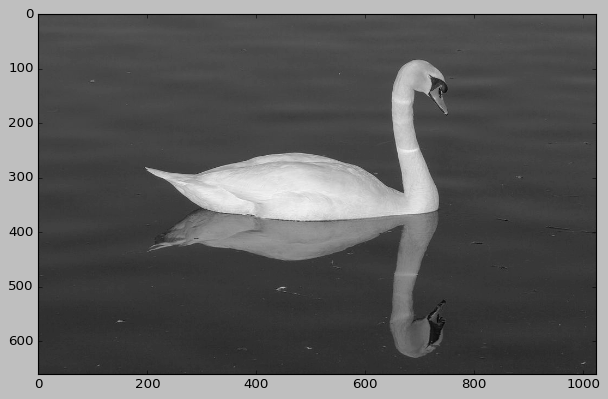

<PIL.Image.Image image mode=LA size=1024x660 at 0x7FA517B05B90>


In [33]:
from six.moves import urllib
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://biblioteca.acropolis.org/wp-content/uploads/2015/03/Cisne.jpg')).convert('LA')
#img = Image.open('lucy.jpg')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

In [34]:
U,D,V = np.linalg.svd(imgmat)
imgmat.shape


(660, 1024)

In [35]:
U.shape

(660, 660)

In [36]:
V.shape

(1024, 1024)

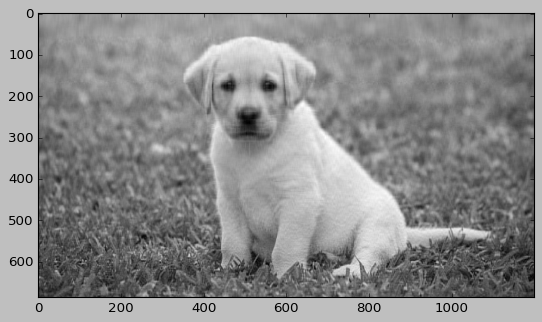

Felicidades la imagen está comprimida


In [58]:
#Cuantos valores crees que son necesarios?
#A=U*D*V
#aqui los elegiremos---------------------------
# por las dimensiones de este caso en particular 
#iremos de 0-660, siendo 660 como normalmente están los datos
#con 50 podemos observar que Lucy se ve casi igual, es decir conservamos aquello que en 
# realidad estaba aportando a la imagen en este caso :D por medio de la variabilidad 
#juega con el valor nvalue y ve que pasa con otros valores
nvalue = 70
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
#ve las dimensiones de la imagen y su descomposicion
#660x1024= U(660X660)D(660X1024)V(1024x1024)
        #=U(660Xnvalues)D(nvaluesXnvalue)V(nvaluesx1024)

        #=U(660X50)(50X50)(50X1024)
# 
plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

¡Ahora es tu turno!, comprime 3 imagenes

[103. 104. 106. ... 184. 183. 182.]
imgmat.shape (803, 1200)
U.shape (803, 803)
V.shape (1200, 1200)


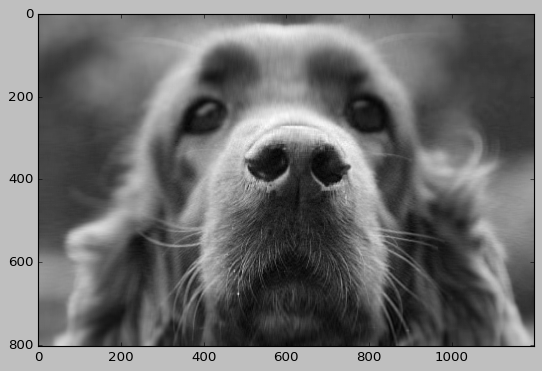

In [52]:
#imagen 1
imgUrl = 'https://imgs.search.brave.com/bYAWGPxv_mDUhKqkkdACgPf2qqaLDan2p6UyueqgVJo/rs:fit:1200:1200:1/g:ce/aHR0cDovL2ltYWdl/czYuZmFucG9wLmNv/bS9pbWFnZS9waG90/b3MvMzUyMDAwMDAv/RG9nLWRvZ3MtMzUy/NDc3MTktMzcwNi0y/NDgwLmpwZw'
img1 = Image.open(urllib.request.urlopen(imgUrl)).convert('LA')
imgmat = np.array(list(img1.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (img1.size[1],img1.size[0])
U,D,V = np.linalg.svd(imgmat)
print('imgmat.shape',imgmat.shape)
print('U.shape',U.shape)
print('V.shape',V.shape)
nvalue = 70 # usando valor 
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
plt.imshow(reconstimg,cmap='gray')
plt.show()

[193. 190. 187. ... 105. 106. 106.]
imgmat.shape (825, 1200)
U.shape (825, 825)
V.shape (1200, 1200)


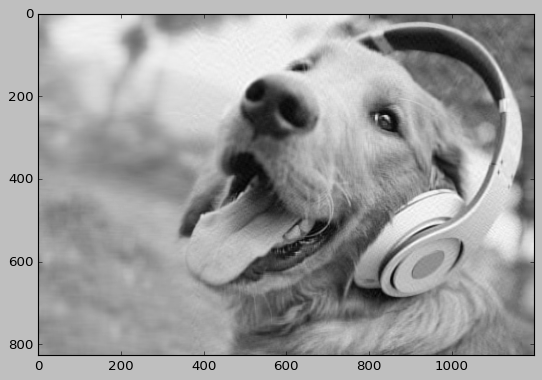

In [53]:
#imagen 2
imgUrl2 = 'https://imgs.search.brave.com/6NblBe1yTV5UtXpQeDoo-30OP3vdNpCt0Ant4nOr5H4/rs:fit:1200:1200:1/g:ce/aHR0cHM6Ly9zdGF0/aWMxLnRoZXJpY2hl/c3RpbWFnZXMuY29t/L3dvcmRwcmVzcy93/cC1jb250ZW50L3Vw/bG9hZHMvMjAxNS8w/Mi9zaHV0dGVyc3Rv/Y2tfQ3V0ZS1Eb2cu/anBn'
img2 = Image.open(urllib.request.urlopen(imgUrl2)).convert('LA')
imgmat = np.array(list(img2.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (img2.size[1],img2.size[0])
U,D,V = np.linalg.svd(imgmat)
print('imgmat.shape',imgmat.shape)
print('U.shape',U.shape)
print('V.shape',V.shape)
nvalue = 70
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
plt.imshow(reconstimg,cmap='gray')
plt.show()

[154. 153. 152. ...  30.  46.  61.]
imgmat.shape (685, 1200)
U.shape (685, 685)
V.shape (1200, 1200)


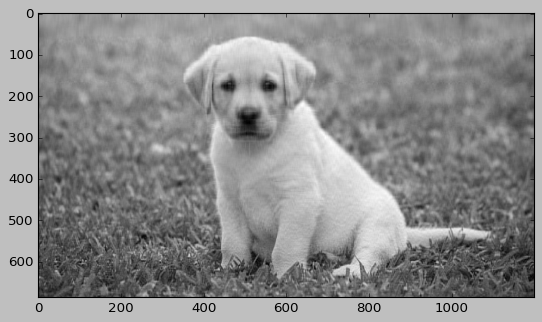

In [54]:
#imagen 3
imgUrl3 = 'https://imgs.search.brave.com/pdVRubgeL8KsfN_B9SQ9qd9HSHeo2Q1gX2hqBLisaJc/rs:fit:1200:731:1/g:ce/aHR0cHM6Ly93d3cu/bmV3c2h1Yi5jby5u/ei9ob21lL2xpZmVz/dHlsZS8yMDE5LzEx/L2RvZy15ZWFycy1h/cmUtYS1teXRoLTIt/eWVhci1vbGQtZG9n/cy1hbHJlYWR5LW1p/ZGRsZS1hZ2VkLXNj/aWVudGlzdHMvX2pj/cl9jb250ZW50L3Bh/ci92aWRlby9pbWFn/ZS5keW5pbWcuMTI4/MC5xNzUuanBnL3Yx/NTc0NTcyMzU4ODE4/L0dFVFRZLWxhYnJh/ZG9yLXB1cHB5LTEx/MjAuanBn'
img3 = Image.open(urllib.request.urlopen(imgUrl3)).convert('LA')
imgmat = np.array(list(img3.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (img3.size[1],img3.size[0])
U,D,V = np.linalg.svd(imgmat)
print('imgmat.shape',imgmat.shape)
print('U.shape',U.shape)
print('V.shape',V.shape)
nvalue = 70
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
plt.imshow(reconstimg,cmap='gray')
plt.show()

# Ejercicio 3

**Feature importances**

Para este ejercicio, te pediremos que sigas el tutorial de la siguiente pagina:

https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e




In [1]:
#tu codigo aqui
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
plt.style.use('ggplot')

In [2]:
# Cargamos los datos
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Z-score the features
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)


# usando PCA 
pca = PCA(n_components=2) # estimate only 2 PCs
X_new = pca.fit_transform(X) # project the original data into the PCA space

In [5]:
iris.target_names # vemos que nombres tenemos

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

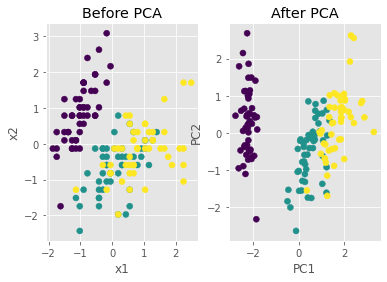

In [6]:
fig, axes = plt.subplots(1,2)
axes[0].scatter(X[:,0], X[:,1], c=y)
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Before PCA')
# PCA 
axes[1].scatter(X_new[:,0], X_new[:,1], c=y)
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')
plt.show()

In [8]:
# Podemos ver que en el espacio PCA, la varianza se maximiza a lo largo de PC1 (explica el 73 % de la varianza) 
# y PC2 (explica el 22 % de la varianza). Juntos, explican el 95%.
print(pca.explained_variance_ratio_)
# [PC1, PC2]

[0.72962445 0.22850762]


In [ ]:
# La  varianza máxima de prueba se puede ver estimando la matriz de covarianza del espacio reducido
# Aqui vemos la matriz de covarianza
np.cov(X_new.T) 

array([[2.93808505e+00, 5.33928780e-16],
       [5.33928780e-16, 9.20164904e-01]])

In [10]:
# Observamos que estos valores 
# (en la diagonal tenemos las varianzas) son iguales a los valores propios reales de la covarianza almacenada en
# 
pca.explained_variance_


array([2.93808505, 0.9201649 ])

In [11]:
print(abs( pca.components_ ))
# a mayor magnitud mayor importancia, entonces vemos que 
#

[[0.52106591 0.26934744 0.5804131  0.56485654]
 [0.37741762 0.92329566 0.02449161 0.06694199]]


In [12]:
def biplot(score, coeff , y):
    '''
    Author: Serafeim Loukas, serafeim.loukas@epfl.ch
    Inputs:
       score: the projected data
       coeff: the eigenvectors (PCs)
       y: the class labels
   '''
    xs = score[:,0] # projection on PC1
    ys = score[:,1] # projection on PC2
    n = coeff.shape[0] # number of variables
    plt.figure(figsize=(10,8), dpi=100)
    classes = np.unique(y)
    colors = ['g','r','y']
    markers=['o','^','x']
    for s,l in enumerate(classes):
        plt.scatter(xs[y==l],ys[y==l], c = colors[s], marker=markers[s]) # color based on group
    for i in range(n):
        #plot as arrows the variable scores (each variable has a score for PC1 and one for PC2)
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'k', alpha = 0.9,linestyle = '-',linewidth = 1.5, overhang=0.2)
        plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'k', ha = 'center', va = 'center',fontsize=10)

    plt.xlabel("PC{}".format(1), size=14)
    plt.ylabel("PC{}".format(2), size=14)
    limx= int(xs.max()) + 1
    limy= int(ys.max()) + 1
    plt.xlim([-limx,limx])
    plt.ylim([-limy,limy])
    plt.grid()
    plt.tick_params(axis='both', which='both', labelsize=14)

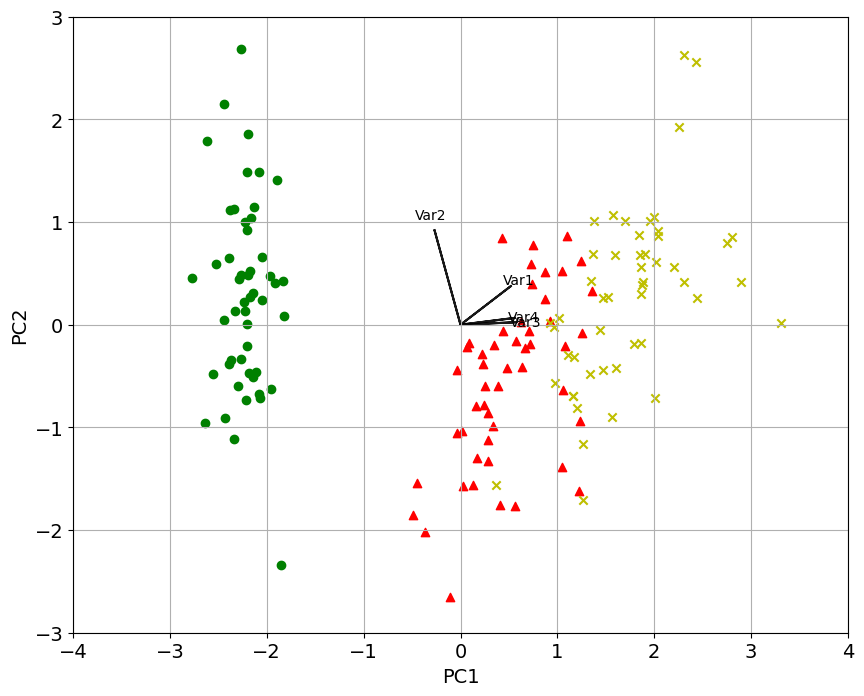

In [20]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault) # reset ggplot style
# Call the biplot function for only the first 2 PCs
biplot(X_new[:,0:2], np.transpose(pca.components_[0:2, :]), y)
plt.show()

Las flechas (variables/características) que apuntan en la misma dirección indican correlación entre las variables que representan, mientras que las flechas que apuntan en direcciones opuestas indican un contraste entre las variables que representan.

In [ ]:
# Var 3 y Var 4 están extremadamente correlacionados positivamente
np.corrcoef(X[:,2], X[:,3])[1,0]


0.9628654314027957

In [ ]:
# Var 2 y Var 3 están correlacionadas negativamente
np.corrcoef(X[:,1], X[:,2])[1,0]


-0.42844010433054014

# Describe lo relevante del ejercicio y que descubriste de las variables análizadas. 

## ¿Qué es feature importance y para que nos sirve?

Podemos definir que es una forma de identificar que tan útil es un componente o variable para nuestros modelos de predicción. Y nos sirve mucho para rápidamente identificar variables que aportan a nuestro modelo. Tambien nos sirve para determinar que componentes o variables son de mayor importancia para la reduccir la cantidad de variables que usamos a solo las importantes.  

## ¿Qué hallazgos fueron los más relevantes durante el análisis del ejercicio?

Uno del os hallazgos fue entender que la diagonal de la varianza máxima de prueba se parece a los eigenvalores, así mismo que la importancia de cada componente es correspondiente a los eigenvectores, es decir a mayor magnitud mayor importancia. 

Otro hallazgo es la comprensión de cómo funciona el PCA usando la matrix de covarianza con la composición y descomposición de la misma, la proyección o transformación de los datos normalizados creando una separación entre los componentes.  



## ¿Dónde lo aplicarías o te sería de utilidad este conocimiento?

Se puede aplicar para cuando tenemos muchas variables y queremos determinar cuál de todas ellas tiene mayor importancia, en especial para aprendizaje no supervisado.  

También podemos utilizarlo cuando tenemos mucho ruido, y así podemos eliminar el ruido también comprimir los datos.  

Podemos usarlo en el procesamiento de datos cuando tenemos variables con gran correlación  
